## Credit card analysis

 Here we are trying to find out the factors that may effect the credit score based on the customers data .Based on the info we find out the factors that effects the credit score
       <ul>
<p>Factors that might effect the credit score:</p>
    <li>Payment History</li>
    <li>Current Debts</li>
    <li>Credit History</li>
    <li>Current CRedit</li>
    </ul>

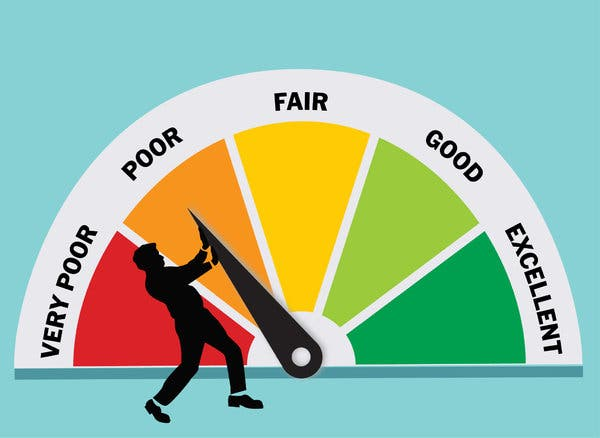

In [2]:
from IPython.display import Image
Image("C:\\Users\\Admin\\Pictures\\credit score.jpg" )

#### LOADING THE LIBRABIES:

In [3]:
import pandas as pd       # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np        # linear algebra

import matplotlib.pyplot as plt   

import seaborn as sns    # visualization tool

import warnings
warnings.filterwarnings('ignore')

#### EXPLORING THE DATA:

In [4]:
base_data=pd.read_excel("C:\\Users\\Admin\\Downloads\\python notes by bharath\\36- Datasets\\Credit Card _Dataset.xls")

 0       2506
 390      231
 326       75
 780       75
 316       72
 2500      51
 396       51
 2400      42
-200       29
 416       28
Name: BILL_AMT2, dtype: int64


Text(0, 0.5, 'total_bills.values')

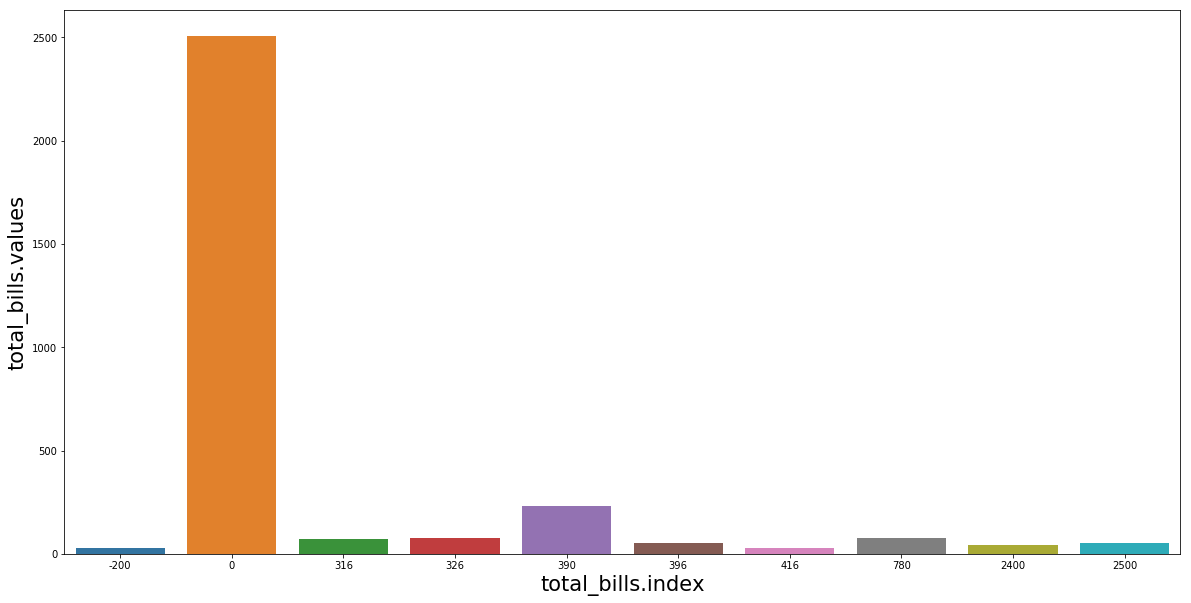

In [6]:
plt.figure(figsize=(20,10))
total_bills= base_data["BILL_AMT2"].value_counts().head(10)
print(total_bills)
sns.barplot(x=total_bills.index,y=total_bills.values )
##plt.xlabel('total_bills.index',fontsize=21)
##plt.ylabel('total_bills.values',fontsize=21)

In [7]:
## checking the head of data:
base_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
## checking the info() method on base data:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

### PRE-PROCESSING STEPS:

In [9]:
## checking for total missing values:
base_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

>we analysed that there are no missing values  in the data. so we can proceed for the further steps

### A visual representation of null value treatment:

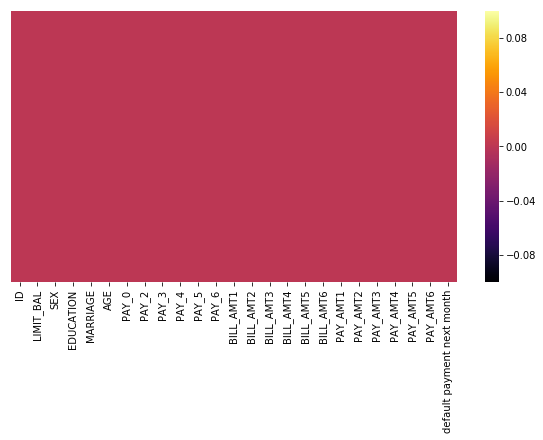

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(base_data.isnull(),cmap = 'inferno',yticklabels=False)

### Null Value Analysis:

In [11]:
##null_values = (base_data.isna().sum()/base_data.shape[0])*100 

##droppedcolumns = null_values[null_values>int(input())].index 

##retainedcolumns = null_values[null_values<int(input())].index  

##base_data.drop(droppedcolumns,axis=1,inplace=True) 

cont=[i for i in base_data.columns] 

char=[i for i in base_data.columns if i not in cont]

## Null value treatment for continous variables

##for i in cont:
    ##base_data[i].fillna(base_data[i].median(),inplace=True)
    
## Null value treatment for categorical variables

##for i in char:
    ##base_data[i].fillna(base_data[i].value_counts().index[0],inplace=True) 
    
##print(droppedcolumns)
##print(retainedcolumns)


### Outlier treatment:
>An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.
.Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile

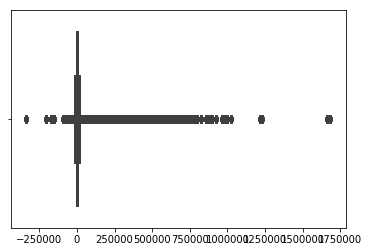

In [12]:
## A Graphical representation of outliers:
for i in base_data.columns:
    sns.boxplot(base_data)

In [13]:
def outliers(base_data):
    for i in base_data.describe().columns:
        Q1=base_data.describe().at['25%',i]
        Q3=base_data.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(base_data[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(base_data[i].median())
            else:
                p.append(j)
        base_data[i]=p
    return df

In [14]:
Q1 = base_data.quantile(0.25)
Q3 = base_data.quantile(0.75)
IQR = Q3 - Q1
base_data = base_data[~(( base_data < (Q1 - 1.5 * IQR)) |( base_data > (Q3 + 1.5 * IQR))).all(axis=1)]
base_data.shape

(30000, 25)

###  garbage value removal:

###  LABEL ENCODER:
>Basically lable encoder is used to convert categorical data, or text data, into numbers

In [15]:
from sklearn.preprocessing import LabelEncoder   
for i in char:
    le=LabelEncoder() 
    base_data[i]=base_data[i].astype(str)
    le.fit(base_data[i])
    x=le.transform(base_data[i])
    base_data[i]=x

In [16]:
base_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


###  CONVERTING TO ANALYTICAL DATASET:

### Univariant Analysis
>univariate analysis means analysis of one variable . 
>Univariate basically tells us how data in each feature is distributed.
>It also tells us about central tendencies like mean, median, and mode.

>Plotting the graphs for each and every column in base_data .
Taking the column values in the x-axis, and count in the y-axis

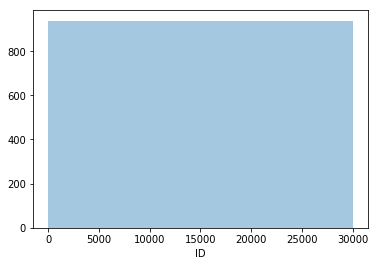

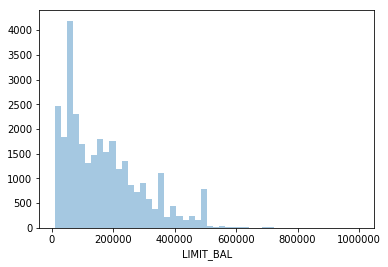

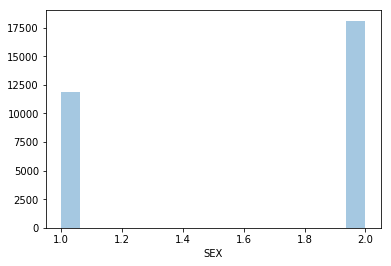

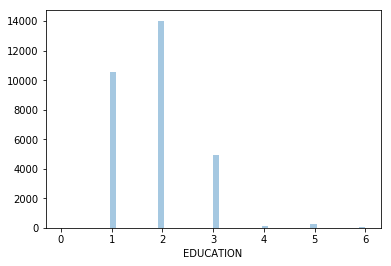

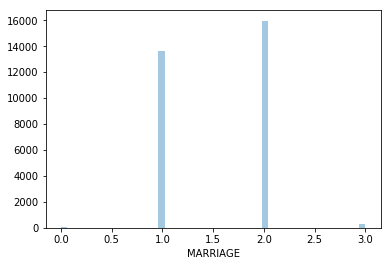

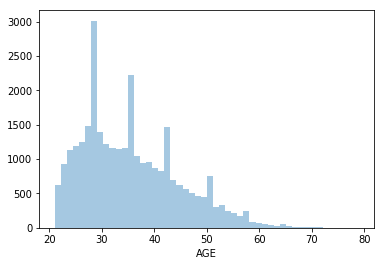

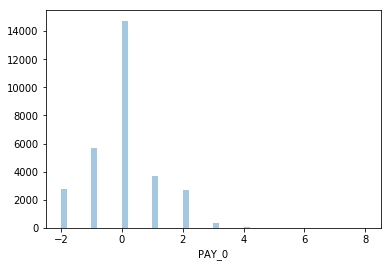

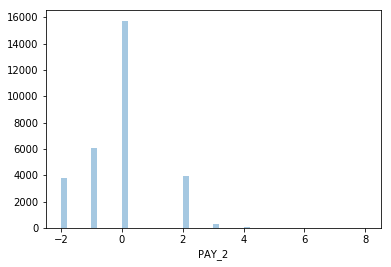

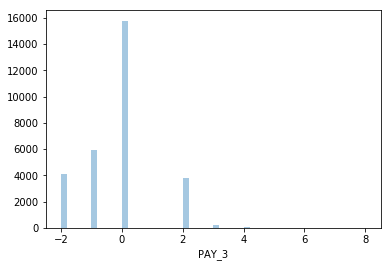

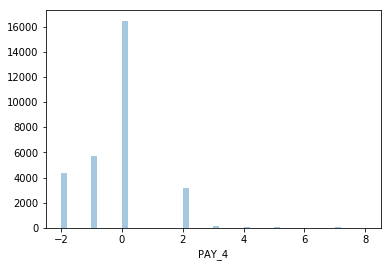

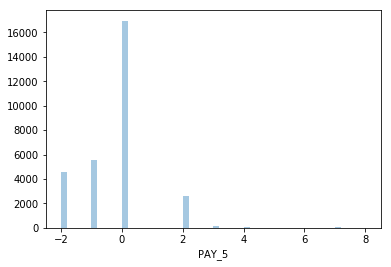

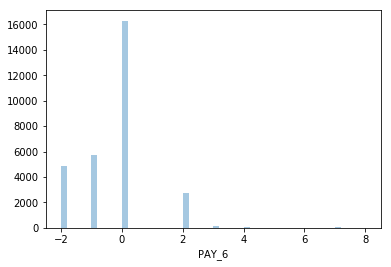

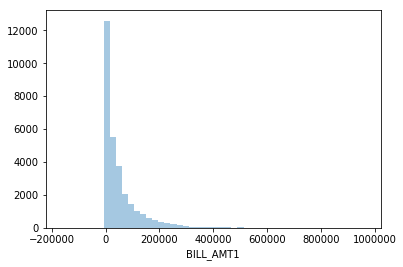

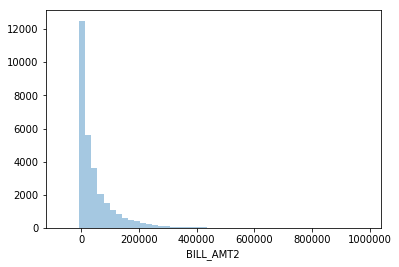

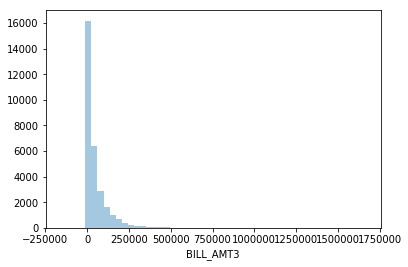

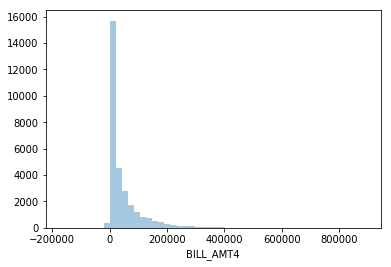

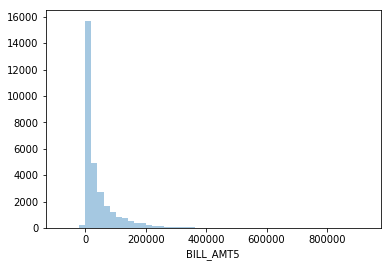

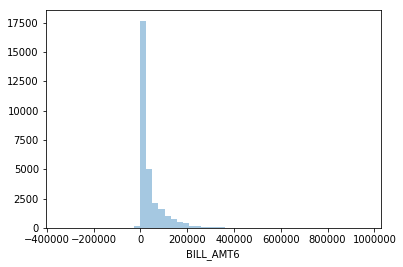

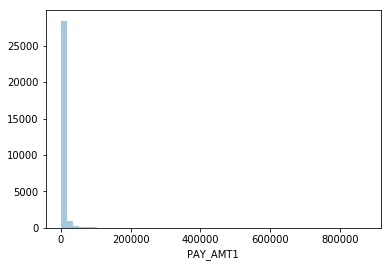

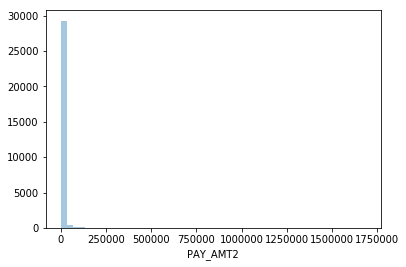

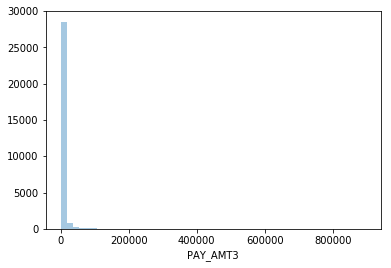

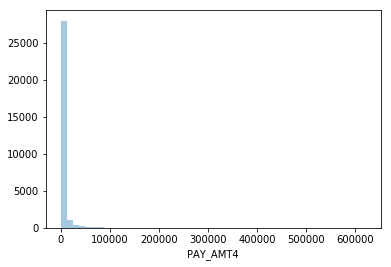

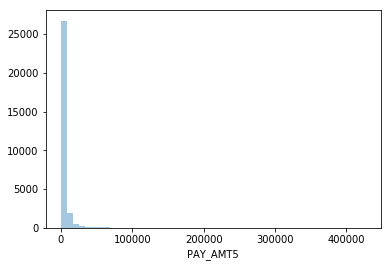

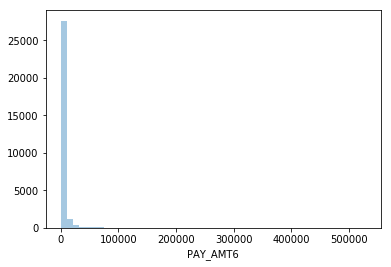

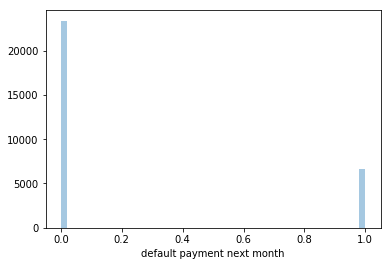

In [17]:
for i in base_data.columns:
    sns.distplot(base_data[i],kde=False)
    plt.show()
    

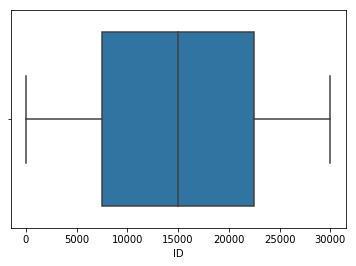

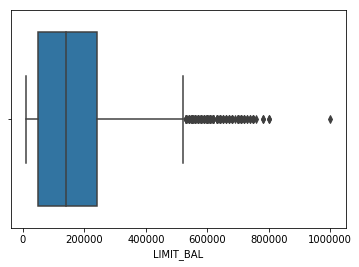

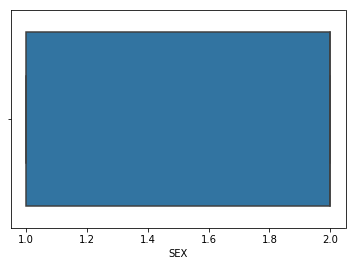

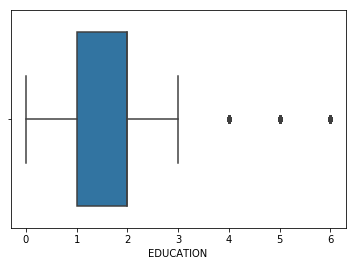

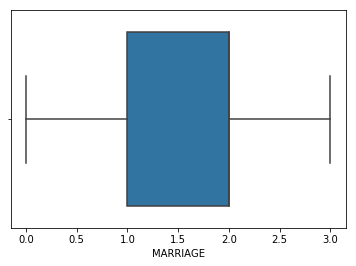

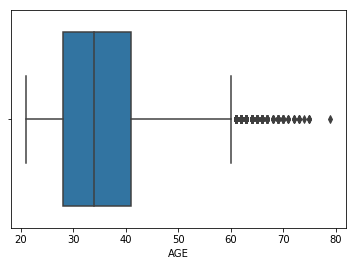

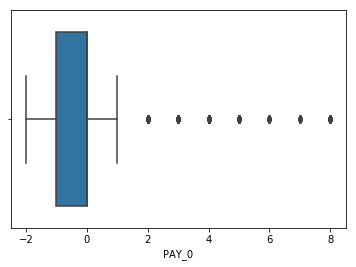

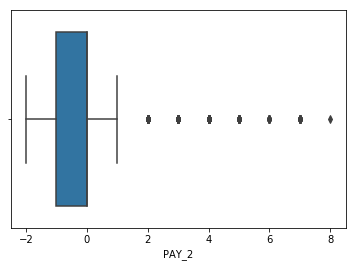

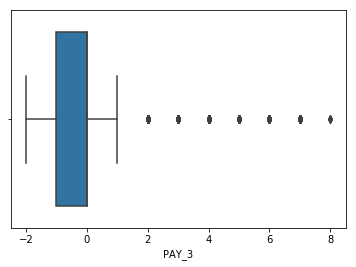

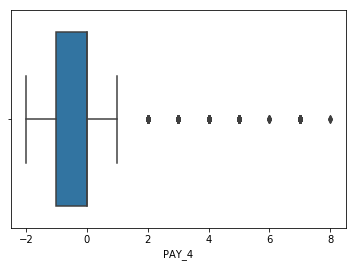

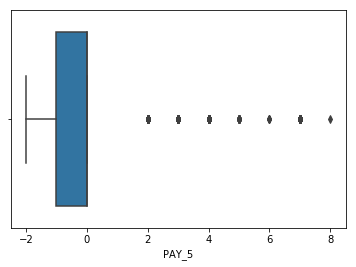

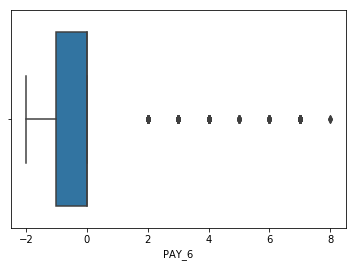

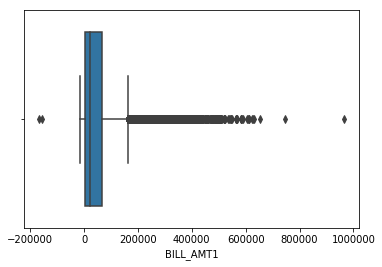

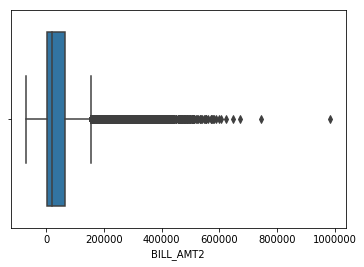

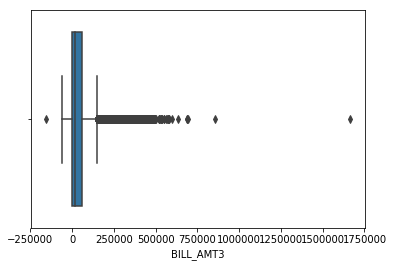

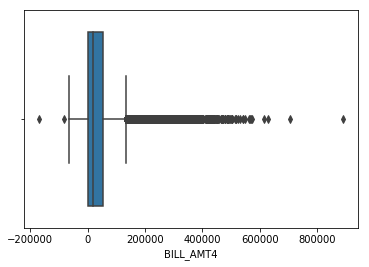

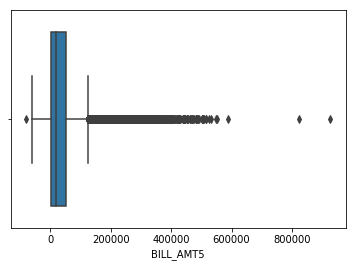

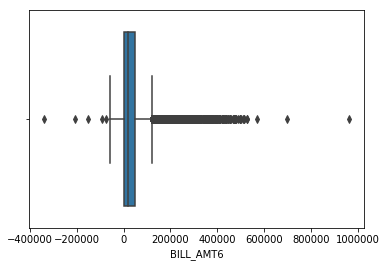

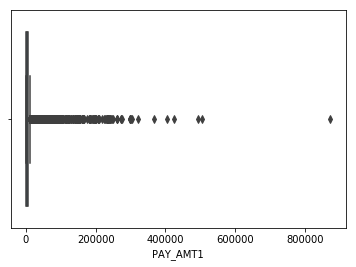

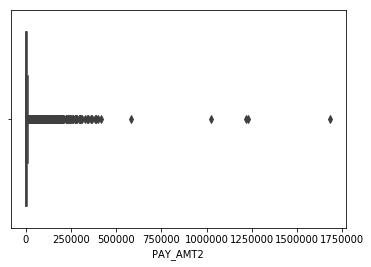

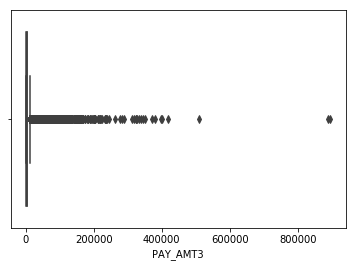

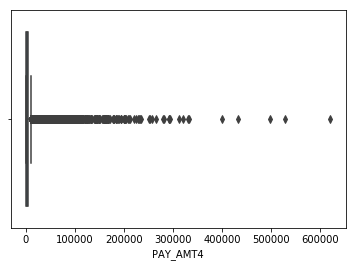

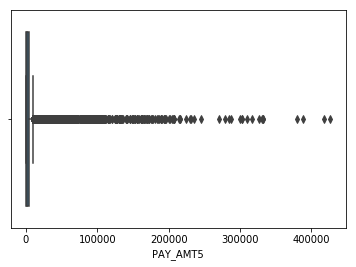

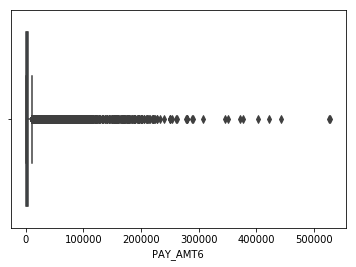

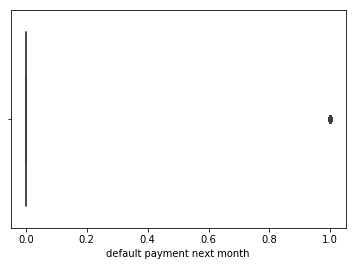

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in base_data.columns:
    sns.boxplot(base_data[i])
    plt.show()
    

### Bivariate Analysis:
> bivariate analysis used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y

In [19]:
## Sorting he values
base_data.var().sort_values(ascending = False).head(6)                  ## index[0:7]

LIMIT_BAL    1.683446e+10
BILL_AMT1    5.422240e+09
BILL_AMT2    5.065705e+09
BILL_AMT3    4.809338e+09
BILL_AMT4    4.138716e+09
BILL_AMT5    3.696294e+09
dtype: float64

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
150000    1110
100000    1048
180000     995
360000     881
60000      825
Name: LIMIT_BAL, dtype: int64


Text(0, 0.5, 'total_bills.values')

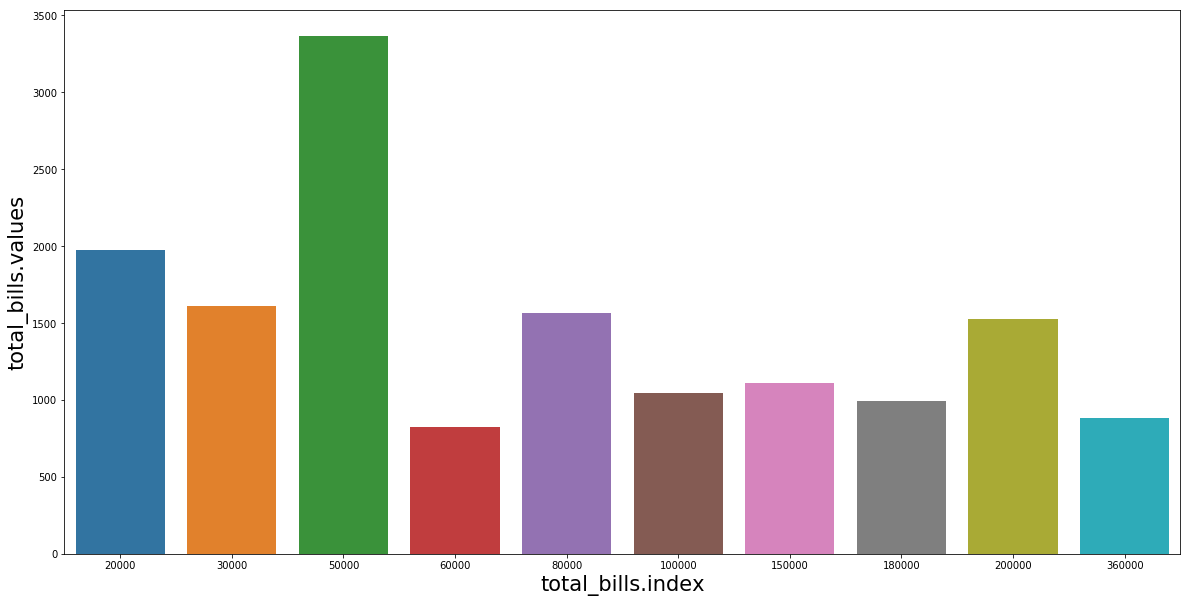

In [21]:
plt.figure(figsize=(20,10))
total_bills= base_data["LIMIT_BAL"].value_counts().head(10)
print(total_bills)
sns.barplot(x=total_bills.index,y=total_bills.values )
plt.xlabel('total_bills.index',fontsize=21)
plt.ylabel('total_bills.values',fontsize=21)

###  Min max scalar:
>Min Max Scalar or Min Max Normalization
>It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
>This is done for distance based algorithms

In [22]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
mn.fit(base_data[['PAY_0','PAY_2','PAY_3','PAY_4']])
pd.DataFrame(mn.transform(base_data[['PAY_0','PAY_2','PAY_3','PAY_4']])).describe()

,0,1,2,3
count,30000.00000,30000.000000,30000.000000,30000.000000
mean,0.19833,0.186623,0.183380,0.177933
std,0.11238,0.119719,0.119687,0.116914
min,0.00000,0.000000,0.000000,0.000000
25%,0.10000,0.100000,0.100000,0.100000
50%,0.20000,0.200000,0.200000,0.200000
75%,0.20000,0.200000,0.200000,0.200000
max,1.00000,1.000000,1.000000,1.000000


In [23]:
## checking the describe() method in base_data
base_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Model Building:


In [24]:
base_data.var().sort_values(ascending=False)

LIMIT_BAL                     1.683446e+10
BILL_AMT1                     5.422240e+09
BILL_AMT2                     5.065705e+09
BILL_AMT3                     4.809338e+09
BILL_AMT4                     4.138716e+09
BILL_AMT5                     3.696294e+09
BILL_AMT6                     3.546692e+09
PAY_AMT2                      5.308817e+08
PAY_AMT6                      3.160383e+08
PAY_AMT3                      3.100051e+08
PAY_AMT1                      2.743423e+08
PAY_AMT4                      2.454286e+08
PAY_AMT5                      2.334266e+08
ID                            7.500250e+07
AGE                           8.496976e+01
PAY_2                         1.433254e+00
PAY_3                         1.432492e+00
PAY_4                         1.366885e+00
PAY_6                         1.322472e+00
PAY_5                         1.284114e+00
PAY_0                         1.262930e+00
EDUCATION                     6.246510e-01
MARRIAGE                      2.724523e-01
SEX        

In [25]:
base_data=base_data[base_data.var().sort_values(ascending=True).index[0:3]]
base_data

,default payment next month,SEX,MARRIAGE
0,1,2,1
1,1,2,2
2,0,2,2
3,0,2,1
4,0,1,1
5,0,1,2
6,0,1,2
7,0,2,2
8,0,2,1
9,0,1,2


## K Means

In [26]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(base_data)
km.labels_

array([2, 1, 1, ..., 0, 0, 0])

In [27]:
len(km.labels_)

30000

In [28]:
## reading base_data:
base_data=pd.read_excel("C:\\Users\\Admin\\Downloads\\python notes by bharath\\36- Datasets\\Credit Card _Dataset.xls")

In [29]:
## Adding a new column(cluster) to the base_data
base_data['cluster']=km.labels_

In [30]:
base_data.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cluster
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,2
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,1


### Model Interpritation:

In [31]:
base_data['cluster'].value_counts()

0    11743
1     9734
2     8523
Name: cluster, dtype: int64

In [32]:
base_data['cluster'].value_counts(normalize=True)*100

0    39.143333
1    32.446667
2    28.410000
Name: cluster, dtype: float64

In [33]:
base_data[base_data['cluster']==0].describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cluster
count,11743.000000,11743.000000,11743.0,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,...,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.0
mean,14812.937154,164347.584093,1.0,1.835391,1.558035,36.440688,0.062080,-0.029209,-0.069233,-0.135400,...,41756.685174,40263.138040,5689.725539,5974.423997,5444.790513,4901.396321,4852.373414,5313.587925,0.241080,0.0
std,8960.551728,136431.886737,0.0,0.793261,0.496642,9.378382,1.132348,1.214479,1.214891,1.200434,...,63449.406900,62454.728296,15872.112767,18527.508241,18403.006592,16657.891633,15381.190487,18891.108291,0.427757,0.0
min,5.000000,10000.000000,1.0,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-61372.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,7075.000000,50000.000000,1.0,1.000000,1.000000,29.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2139.500000,1428.500000,1000.000000,849.000000,390.000000,300.000000,260.000000,0.000000,0.000000,0.0
50%,14084.000000,130000.000000,1.0,2.000000,2.000000,35.000000,0.000000,0.000000,0.000000,0.000000,...,18418.000000,17643.000000,2100.000000,2000.000000,1679.000000,1473.000000,1500.000000,1300.000000,0.000000,0.0
75%,24001.500000,240000.000000,1.0,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,...,50524.500000,49439.000000,5020.000000,5000.000000,4494.000000,4020.000000,4000.500000,4000.000000,0.000000,0.0
max,30000.000000,800000.000000,1.0,6.000000,2.000000,79.000000,8.000000,7.000000,8.000000,8.000000,...,823540.000000,699944.000000,505000.000000,388126.000000,508229.000000,528897.000000,332000.000000,527143.000000,1.000000,0.0


In [34]:
base_data[base_data['cluster']==0].describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cluster
count,11743.000000,11743.000000,11743.0,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,...,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.000000,11743.0
mean,14812.937154,164347.584093,1.0,1.835391,1.558035,36.440688,0.062080,-0.029209,-0.069233,-0.135400,...,41756.685174,40263.138040,5689.725539,5974.423997,5444.790513,4901.396321,4852.373414,5313.587925,0.241080,0.0
std,8960.551728,136431.886737,0.0,0.793261,0.496642,9.378382,1.132348,1.214479,1.214891,1.200434,...,63449.406900,62454.728296,15872.112767,18527.508241,18403.006592,16657.891633,15381.190487,18891.108291,0.427757,0.0
min,5.000000,10000.000000,1.0,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-61372.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,7075.000000,50000.000000,1.0,1.000000,1.000000,29.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2139.500000,1428.500000,1000.000000,849.000000,390.000000,300.000000,260.000000,0.000000,0.000000,0.0
50%,14084.000000,130000.000000,1.0,2.000000,2.000000,35.000000,0.000000,0.000000,0.000000,0.000000,...,18418.000000,17643.000000,2100.000000,2000.000000,1679.000000,1473.000000,1500.000000,1300.000000,0.000000,0.0
75%,24001.500000,240000.000000,1.0,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,...,50524.500000,49439.000000,5020.000000,5000.000000,4494.000000,4020.000000,4000.500000,4000.000000,0.000000,0.0
max,30000.000000,800000.000000,1.0,6.000000,2.000000,79.000000,8.000000,7.000000,8.000000,8.000000,...,823540.000000,699944.000000,505000.000000,388126.000000,508229.000000,528897.000000,332000.000000,527143.000000,1.000000,0.0


In [35]:
base_data[base_data['cluster']==1].describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cluster
count,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,...,9734.000000,9734.000000,9734.000000,9.734000e+03,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.0
mean,14884.712451,163378.878159,1.986542,1.720567,2.033183,31.349599,-0.066263,-0.195500,-0.212451,-0.256626,...,38922.786521,37832.352990,5631.622457,5.742343e+03,5079.020752,4690.509143,4919.866550,5179.713479,0.199301,1.0
std,8413.259958,123508.992596,0.115231,0.767946,0.179122,7.887419,1.083025,1.144675,1.158224,1.115306,...,57321.817368,56359.977685,17925.761740,2.349652e+04,17259.090889,14961.588523,16658.897187,17070.841410,0.399496,0.0
min,2.000000,10000.000000,1.000000,0.000000,2.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-36156.000000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7529.250000,60000.000000,2.000000,1.000000,2.000000,26.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1835.750000,1279.250000,1000.000000,9.247500e+02,470.250000,300.000000,247.000000,200.000000,0.000000,1.0
50%,15297.000000,140000.000000,2.000000,2.000000,2.000000,29.000000,0.000000,0.000000,0.000000,0.000000,...,18087.000000,17150.000000,2105.500000,2.024000e+03,1914.500000,1523.500000,1550.000000,1594.000000,0.000000,1.0
75%,22021.750000,230000.000000,2.000000,2.000000,2.000000,35.000000,0.000000,0.000000,0.000000,0.000000,...,49263.750000,48542.000000,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4083.250000,0.000000,1.0
max,29932.000000,780000.000000,2.000000,6.000000,3.000000,70.000000,8.000000,7.000000,7.000000,7.000000,...,587067.000000,513798.000000,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000,1.0


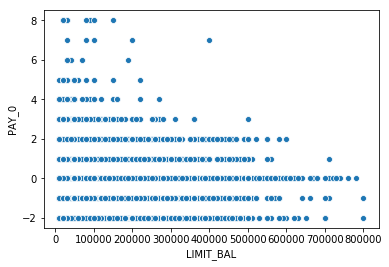

In [36]:
sns.scatterplot(x='LIMIT_BAL',y='PAY_0',data=base_data[base_data['cluster']==0])

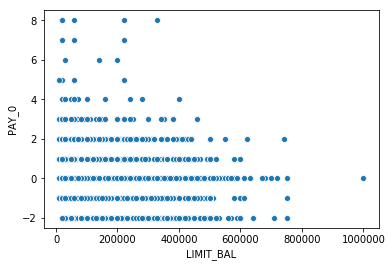

In [37]:
sns.scatterplot(x='LIMIT_BAL',y='PAY_0',data=base_data[base_data['cluster']==2])